# 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv(r"C:\Users\xdham\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\xdham\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\xdham\Downloads\Transactions.csv")


print("Customers Info:")
customers.info()
print("\nProducts Info:")
products.info()
print("\nTransactions Info:")
transactions.info()

print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


print("\nCustomers Head:")
print(customers.head())
print("\nProducts Head:")
print(products.head())
print("\nTransactions Head:")
print(transactions.head())


Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dt

In [7]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['CalculatedTotalValue'] = transactions['Quantity'] * transactions['Price']
discrepancies = transactions[transactions['TotalValue'] != transactions['CalculatedTotalValue']]
print("\nDiscrepancies between TotalValue and CalculatedTotalValue:")
print(discrepancies)


transactions['TotalValue'] = transactions['CalculatedTotalValue']
transactions.drop('CalculatedTotalValue', axis=1, inplace=True)


Discrepancies between TotalValue and CalculatedTotalValue:
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
17         T00270      C0101      P034 2024-11-07 02:48:08         3   
29         T00218      C0148      P057 2024-01-17 19:40:55         3   
30         T00417      C0035      P057 2024-04-20 22:54:54         3   
31         T00492      C0120      P057 2024-08-08 05:40:02         3   
35         T00703      C0092      P057 2024-02-04 00:31:54         3   
..            ...        ...       ...                 ...       ...   
924        T00823      C0095      P079 2024-09-30 10:45:06         3   
935        T00660      C0057      P008 2024-09-23 16:46:01         3   
946        T00646      C0036      P091 2024-01-23 12:53:51         3   
947        T00793      C0054      P091 2024-10-07 17:48:28         3   
948        T00798      C0015      P091 2024-09-21 01:39:03         3   

     TotalValue   Price  CalculatedTotalValue  
17       651.15  217.05    

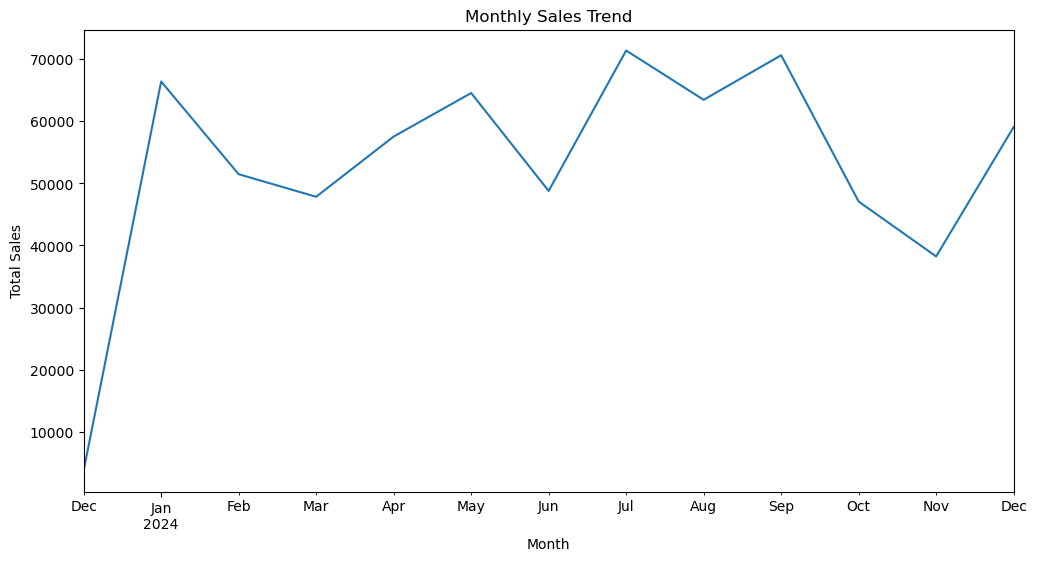

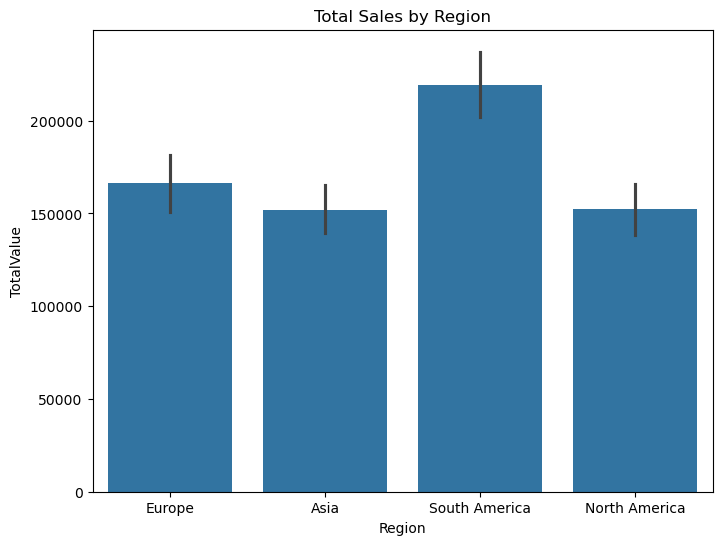

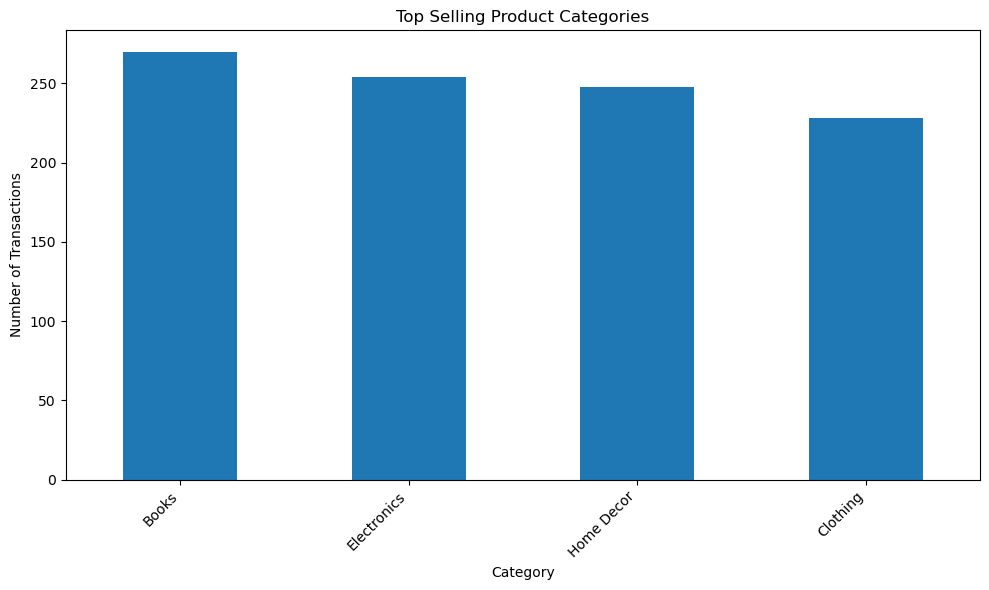

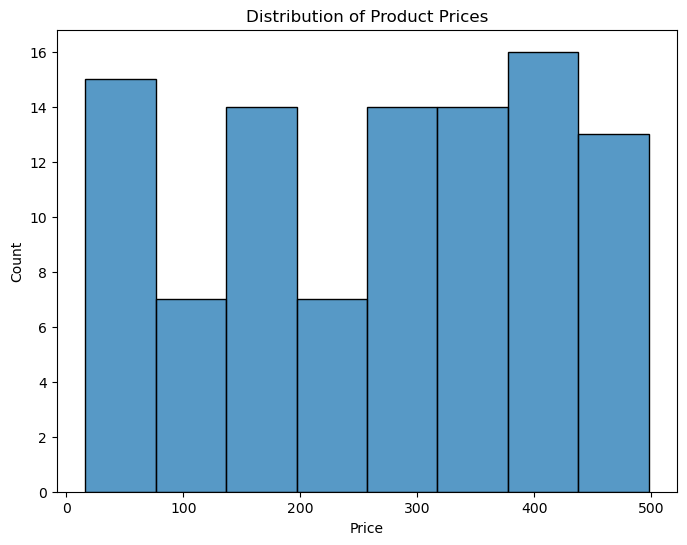

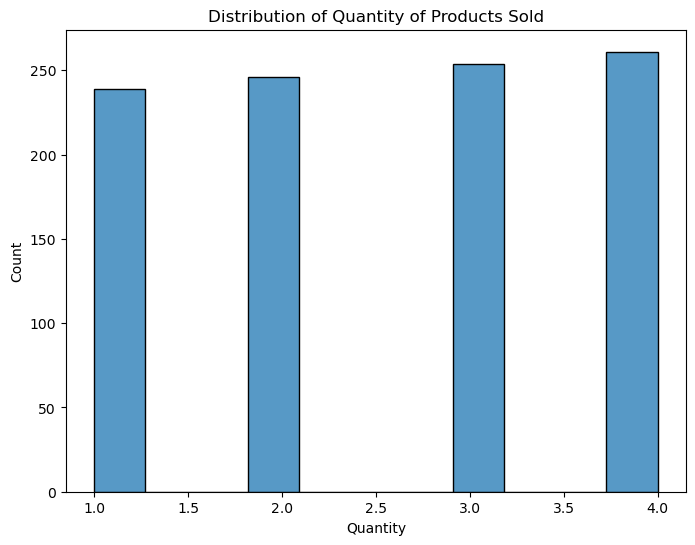

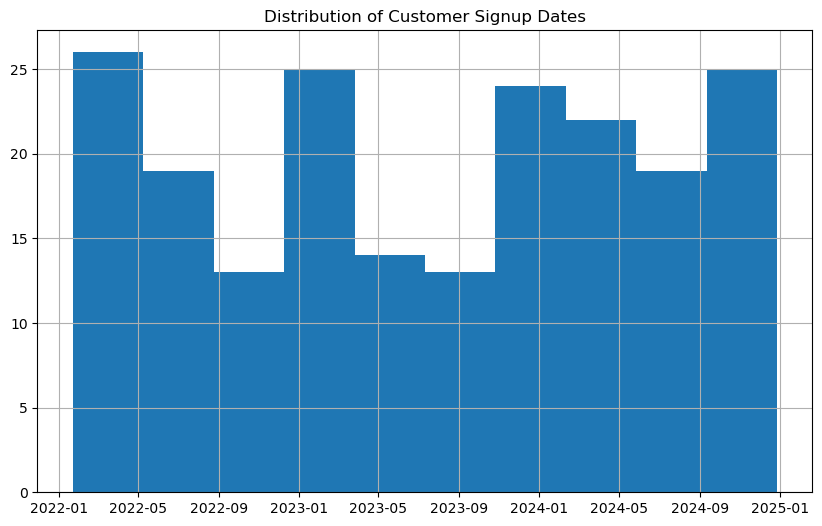

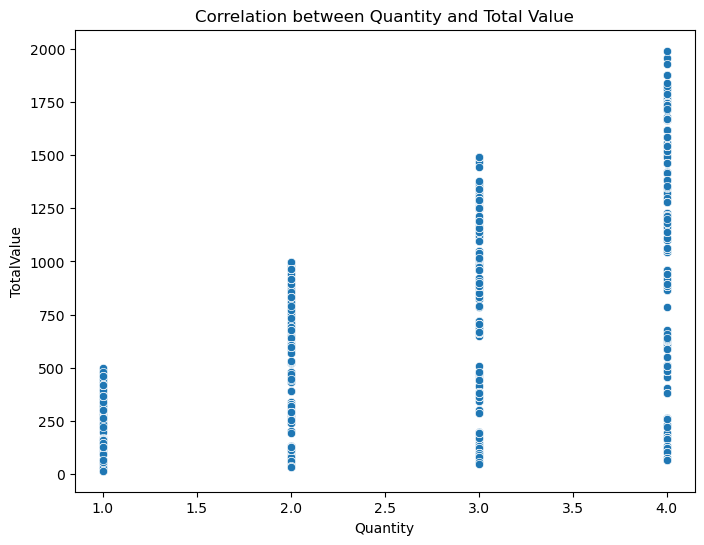

In [9]:

merged_df = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products, on='ProductID', how='left')

plt.figure(figsize=(12, 6))
merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='TotalValue', data=merged_df, estimator='sum')
plt.title('Total Sales by Region')
plt.show()


plt.figure(figsize=(10, 6))
merged_df['Category'].value_counts().plot(kind='bar')
plt.title('Top Selling Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



plt.figure(figsize=(8,6))
sns.histplot(products['Price'])
plt.title('Distribution of Product Prices')
plt.show()


plt.figure(figsize=(8,6))
sns.histplot(transactions['Quantity'])
plt.title('Distribution of Quantity of Products Sold')
plt.show()


plt.figure(figsize=(10,6))
customers['SignupDate'].hist()
plt.title('Distribution of Customer Signup Dates')
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(x='Quantity', y='TotalValue', data=transactions)
plt.title('Correlation between Quantity and Total Value')
plt.show()